# How Can You Get a Job as a Developer Without Proper Education?

A data analysis using Stackoverflow’s 2019 Annual Developer Survey.      

This notebook will undertake an investigation to find answers to the questions posed in this blogpost: https://karimelkanj.github.io/blog/professional-developer-no-college-degree/

## Introduction

A special thanks to the Stack Overflow Annual Developer Survey 2019, as we will use its dataset to uncover one of the hottest question right now. In our current economic crisis, and in a world where normal jobs cannot be executed in a tradiotional manner, the demand for a flexible remote job has been increasing tremendously.  The survey conducted by Stack Overflow covers a wide variety of developer related information. In this notebook, the sections related to developers' educational background will be selected for investigation. In order to provide a ‘Yes or No’ answer to our main question, three sub-questions need to be answered.

## Questions:

1. What makes this survey suitable for analysis?     

2. What educational background do professional developers have?        

3. What is the best route to follow to become a professional developer?


## Data Acquisition & Preparation

In [2]:
# Libraries Used
import numpy as np
import pandas as pd
from collections import Counter

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns


In [3]:
# Reading Stackoverflow survey data and creating a dataframe called df_2019 that contains all the data
df_2019 = pd.read_csv('Downloads/StackOverflow Survey/developer_survey_2019/survey_results_public.csv')

In [4]:
# Showing the first five rows of the dataset
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

## Data Cleaning

Since the topic of this notebook is focused on education alone, all the columns related to education will be selected for analysis. 

In [5]:
# Creating a new dataset containing the relevant columns for our investigation
newdf_2019 = df_2019[['Respondent','MainBranch', 'EdLevel','UndergradMajor','EduOther']].copy()
newdf_2019.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
0,1,I am a student who is learning to code,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ..."
1,2,I am a student who is learning to code,"Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...
2,3,"I am not primarily a developer, but I write co...","Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ..."
3,4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
4,5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...


## Data Visualization I

In [6]:
# Rearranging data for sns plotting
count_df1 = newdf_2019.groupby(['Respondent','MainBranch']).count().reset_index()
count_df1.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
0,1,I am a student who is learning to code,1,0,1
1,2,I am a student who is learning to code,1,0,1
2,3,"I am not primarily a developer, but I write co...",1,1,1
3,4,I am a developer by profession,1,1,1
4,5,I am a developer by profession,1,1,1


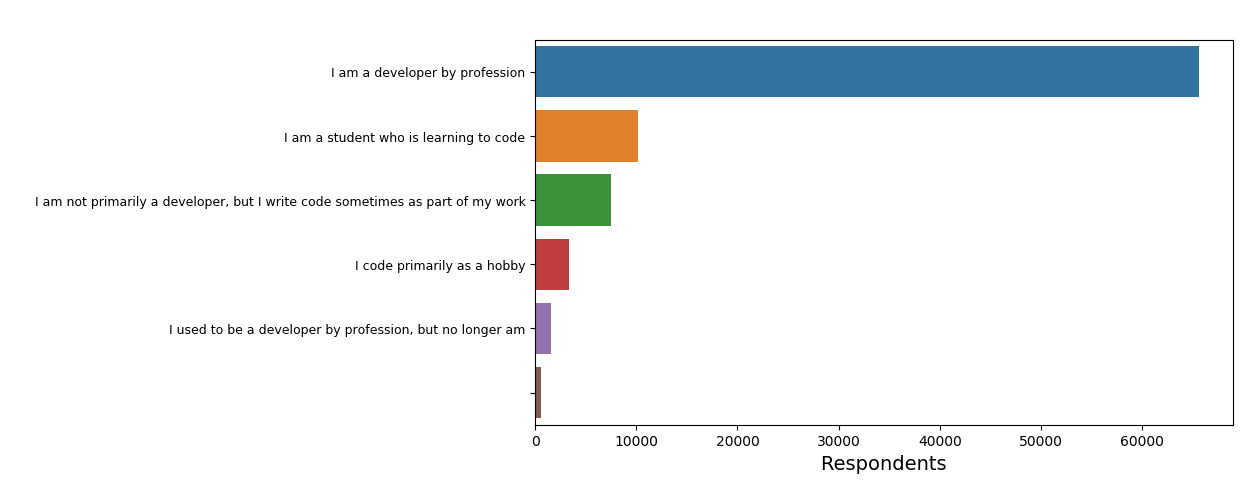

In [157]:
# sns plot for the same data
# selecting figure size
plt.figure(figsize=(9,5))
# selecting x and y data
sns.countplot(y = count_df1.MainBranch, order=newdf_2019.MainBranch.value_counts().index);

# plt.title(' '.title(), fontsize=20);
# Labeling x axis
plt.xlabel('Respondents'.title(), fontsize=14);
# Selecting font sizes for x and y labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
# plotting the horizontal Bar chart
plt.show()

In [29]:
newdf_2019_copy = newdf_2019.copy()

In [31]:
# Create a new columns to flag each respondent if their background type is Computer Related or not
def edu_check(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule we made in this function
    '''

    if value == 'Computer science, computer engineering, or software engineering':
        return 'Computer Related'
    return 'Not Computer Related'

newdf_2019_copy['BackgroundType'] = newdf_2019_copy['UndergradMajor'].apply(edu_check)

newdf_2019_copy['BackgroundType'].value_counts(normalize=True)

Computer Related        0.531193
Not Computer Related    0.468807
Name: BackgroundType, dtype: float64

About 47% of all respondents do not hold a College degree in Computer related fields. However, this number includes everyone. Meaning that students, unemployed individuals and even people who just code as a hobby, are all acounted for. Thus, a further investigation is required in order to breakdown the data even more.

## Data Cleaning II

In [7]:
# Filtering the data so it only contains "developer by profession" information
newdf_2019['MainBranch'] = newdf_2019['MainBranch'].fillna('')
edlvl_19 = newdf_2019[newdf_2019['MainBranch'].str.contains('developer by')]
edlvl_19.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
3,4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
4,5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
6,7,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ..."
8,9,I am a developer by profession,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
9,10,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN


In [8]:
# Generating the unique values in the EdLevel column
special_eds = edlvl_19.EdLevel.unique()
special_eds

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Primary/elementary school', 'Associate degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'], dtype=object)

## Data Visualization II

In [9]:
# Creating the features of a dataframe
# Counting filtered features
one = edlvl_19.loc[edlvl_19['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'].count()[0]
two = edlvl_19.loc[edlvl_19['EdLevel'] == 'Some college/university study without earning a degree'].count()[0]
three = edlvl_19.loc[edlvl_19['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'].count()[0]
four = edlvl_19.loc[edlvl_19['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'].count()[0]
five = edlvl_19.loc[edlvl_19['EdLevel'] == 'Primary/elementary school'].count()[0]
six = edlvl_19.loc[edlvl_19['EdLevel'] == 'Associate degree'].count()[0]
seven = edlvl_19.loc[edlvl_19['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'].count()[0]
nine = edlvl_19.loc[edlvl_19['EdLevel'] == 'Professional degree (JD, MD, etc.)'].count()[0]
ten = edlvl_19.loc[edlvl_19['EdLevel'] == 'I never completed any formal education'].count()[0]

# Creating shorter Labels
Labels = ['Bachelor Degree', 'Some College studies/ No Degree', 'Master degree', 'Doctoral Degree', 'Elementary school', 'Associate Degree', 'Secondary School', 'Professional Degree', 'No Education']
#explode = (0.1,0,0.2,0.4,0.6,0.8,1,1.2,1.4)
#plt.pie([one,two,three,four,five,six,seven,nine,ten], labels = Labels, explode = explode, shadow=True, radius=2.1, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.31,wedgeprops={"edgecolor":"0",'linewidth': 1, 'antialiased': True})
#plt.axis('equal')

#plt.show()

In [10]:
# Creating the new dataframe 
dataF = pd.DataFrame({'Degrees': ['Bachelor Degree', 'Some College studies/ No Degree', 'Master degree', 'Doctoral Degree', 'Elementary school', 'Associate Degree', 'Secondary School', 'Professional Degree', 'No Education'], 'Counts': [one,two,three,four,five,six,seven,nine,ten]})
dataF.set_index('Degrees', inplace=True)
dataF.sort_values('Counts',inplace=True)
dataF

,Counts
Degrees,
No Education,330
Elementary school,349
Professional Degree,932
Doctoral Degree,1542
Associate Degree,2222
Secondary School,3437
Some College studies/ No Degree,7538
Master degree,16404
Bachelor Degree,33209


In [11]:
# Total number of respondents
Sum = dataF['Counts'].sum()
Sum

65963

In [12]:
# Add new Column Percentages
# Rounding values
dataF['Percentage'] = np.round(dataF.Counts*100/Sum, decimals=1)
del dataF['Counts']
dataF

,Percentage
Degrees,
No Education,0.5
Elementary school,0.5
Professional Degree,1.4
Doctoral Degree,2.3
Associate Degree,3.4
Secondary School,5.2
Some College studies/ No Degree,11.4
Master degree,24.9
Bachelor Degree,50.3


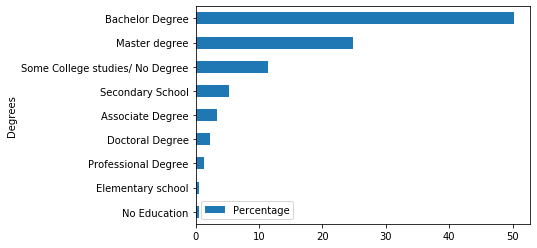

In [13]:
# Plotting a Horizontal barchart
dataF.plot.barh()


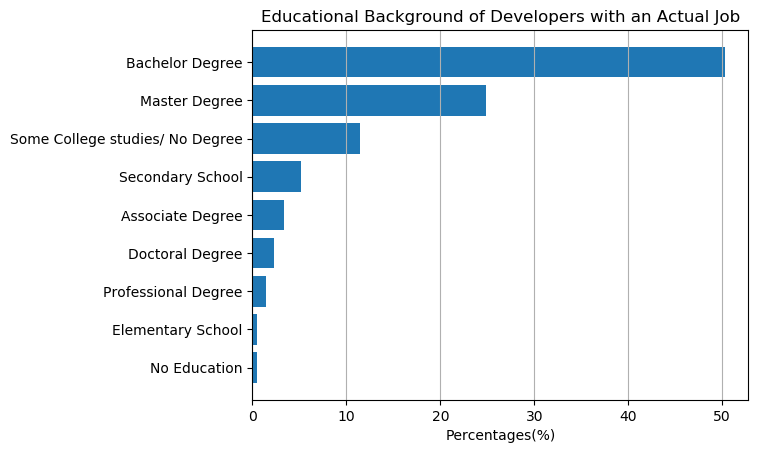

In [14]:
# Plotting a horizontal bar chart with additional stuff
plt.rcdefaults()
fig, ax = plt.subplots()

Labels1=('No Education', 'Elementary School', 'Professional Degree', 'Doctoral Degree', 'Associate Degree', 'Secondary School', 'Some College studies/ No Degree', 'Master Degree', 'Bachelor Degree')
xlabels = dataF['Percentage']

plt.barh(np.arange(len(Labels1)), xlabels)
 
# Create names on the y-axis
plt.yticks(np.arange(len(Labels1)), Labels1)
#Labels
ax.set_title("Educational Background of Developers with an Actual Job")
ax.set_xlabel('Percentages(%)')
ax.xaxis.grid(True)
# Show graphic
plt.show()

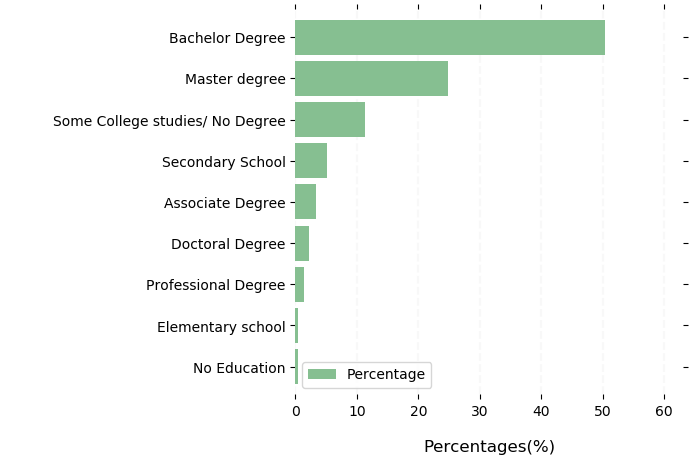

In [15]:
# Plotting a refined version of the horizontal Bar Chart
ax2 = dataF.plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

  # Switch off ticks
ax2.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax2.get_xticks()
for tick in vals:
  ax2.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax2.set_xlabel("Percentages(%)", labelpad=15, weight='normal', size=12)

  # Set y-axis label
ax2.set_ylabel(" ", labelpad=20, weight='bold', size=12)

  #Put Labels next to bars
#for i, v in enumerate(df2['Percentage']):
    #ax2.text(v + 3, i + .25, str(v), color='black')

  # Format y-axis label
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [16]:
# Rearranging data for sns plotting
count_df2 = edlvl_19.groupby(['Respondent','EdLevel']).count().reset_index()
count_df2.head()

,Respondent,EdLevel,MainBranch,UndergradMajor,EduOther
0,4,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,1,1
1,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,1,1
2,7,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,1,1
3,9,Some college/university study without earning ...,1,1,1
4,10,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",1,0,0


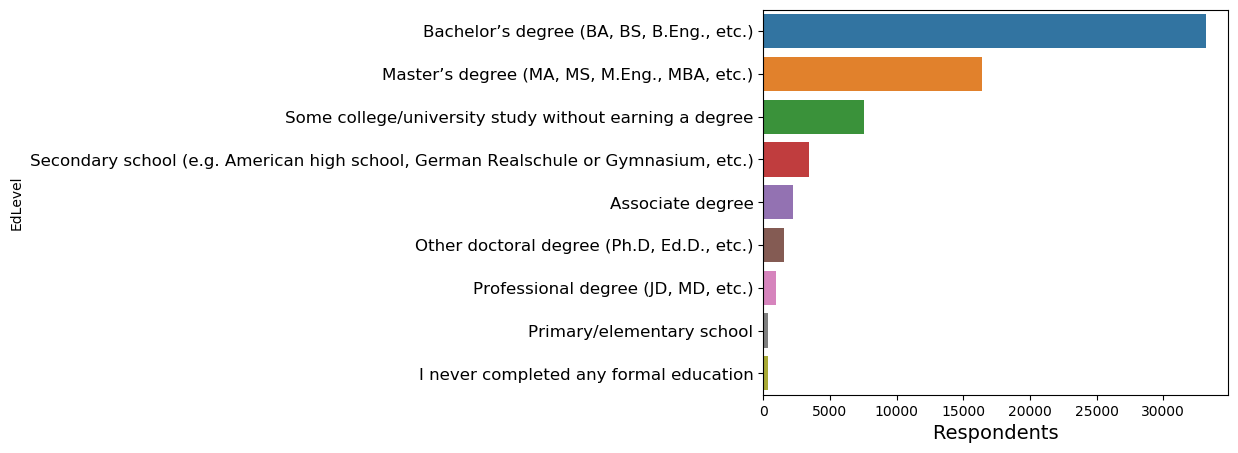

In [17]:
# Sns plot for the same data
plt.figure(figsize=(6,5))
sns.countplot(y = count_df2.EdLevel, order=edlvl_19.EdLevel.value_counts().index);

# Putting Labels
plt.title(''.title(), fontsize=20);
plt.xlabel('Respondents'.title(), fontsize=14);
# Font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show()

## Interpretation II
About 75% of all professional developpers have either a bachelor's degree or a Master's degree. Thus, odds aren't looking so great for people without a university degree. However, further investigation is recommended to uncover more details.   
What are their majors?

## Data Visualization III

In [18]:
# Showing the unique values of developers' majors
major_19 = edlvl_19.UndergradMajor.unique()
major_19

array(['Computer science, computer engineering, or software engineering',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       nan,
       'Information systems, information technology, or system administration',
       'A business discipline (ex. accounting, finance, marketing)',
       'A natural science (ex. biology, chemistry, physics)',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Web development or web design', 'Mathematics or statistics',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'A social science (ex. anthropology, psychology, political science)',
       'I never declared a major',
       'A health science (ex. nursing, pharmacy, radiology)'],
      dtype=object)

In [19]:
# Creating the features of a dataframe
# Counting filtered features
one_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'].count()[0]
two_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'].count()[0]
three_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Information systems, information technology, or system administration'].count()[0]
four_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'].count()[0]
five_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)'].count()[0]
six_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)'].count()[0]
seven_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Web development or web design'].count()[0]
eight_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Mathematics or statistics'].count()[0]
nine_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'].count()[0]
ten_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)'].count()[0]
eleven_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'I never declared a major'].count()[0]
twelve_1 = edlvl_19.loc[edlvl_19['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'].count()[0]

# Creating shorter labels
Labels2 = ['Computer Related Fields', 'Other Engineering Disciplines', 'Information Systems & Technology', 'Business', 'Natural Science', 'Humanity Disciplines', 'Web Development', 'Statistics', 'Arts', 'Social Science','Not Declared','Health Science']
#explode = (0,0,0,0,0,0,0,0,0,0,0,0)
# Do the Donut shape
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

#plt.pie([one_1,two_1,three_1,four_1,five_1,six_1,seven_1,eight_1,nine_1,ten_1,eleven_1,twelve_1], labels = Labels2, shadow=False, explode = explode, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4)

#plt.axis('equal')
#plt.show()

In [20]:
# Create the new dataframe
df2 = pd.DataFrame({'UndergradMajor': Labels2, 'Counts2': [one_1,two_1,three_1,four_1,five_1,six_1,seven_1,eight_1,nine_1,ten_1,eleven_1,twelve_1]})
df2.set_index('UndergradMajor', inplace=True)
df2.sort_values('Counts2',inplace=True)
df2

,Counts2
UndergradMajor,
Health Science,159
Not Declared,674
Social Science,911
Arts,944
Humanity Disciplines,1167
Business,1183
Statistics,2184
Natural Science,2204
Web Development,2749


In [21]:
# Total number of respondents
Sum2 = df2['Counts2'].sum()
Sum2

61529

In [22]:
# Add new Column Percentages
# Rounding values
df2['Percentage'] = np.round(df2.Counts2*100/Sum2, decimals=1)
del df2['Counts2']
df2

,Percentage
UndergradMajor,
Health Science,0.3
Not Declared,1.1
Social Science,1.5
Arts,1.5
Humanity Disciplines,1.9
Business,1.9
Statistics,3.5
Natural Science,3.6
Web Development,4.5


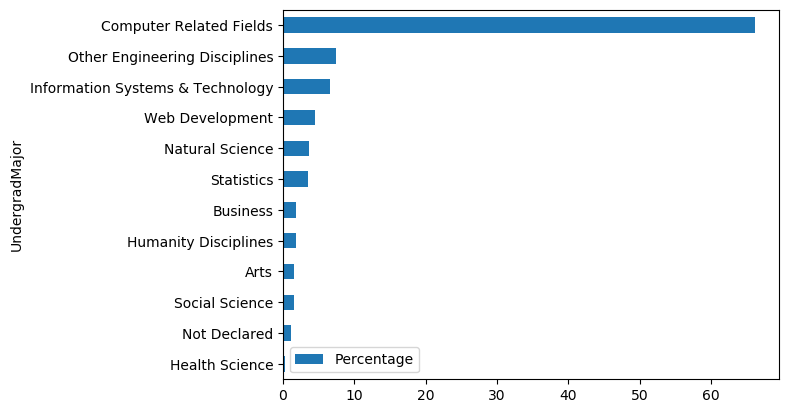

In [23]:
# Plotting a Horizontal bar chart
df2.plot.barh()

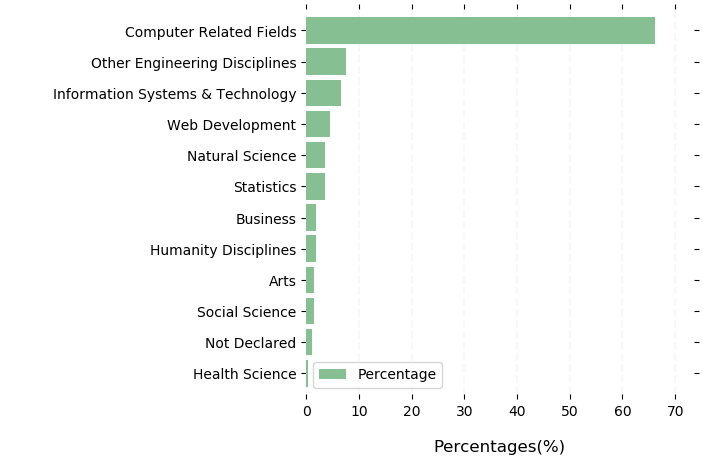

In [24]:
# Plotting a more refined version of the horizontal bar chart
ax3 = df2.plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

  # Switch off ticks
ax3.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax3.get_xticks()
for tick in vals:
  ax3.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax3.set_xlabel("Percentages(%)", labelpad=15, weight='normal', size=12)

  # Set y-axis label
ax3.set_ylabel(" ", labelpad=20, weight='bold', size=12)

  #Put Labels next to bars
#for i, v in enumerate(df2['Percentage']):
    #ax3.text(v + 3, i + .25, str(v), color='black')

  # Format y-axis label
ax3.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [25]:
# rearranging for plotting
edlvl_count = edlvl_19.groupby(['Respondent','UndergradMajor']).count().reset_index()
edlvl_count.head()

,Respondent,UndergradMajor,MainBranch,EdLevel,EduOther
0,4,"Computer science, computer engineering, or sof...",1,1,1
1,5,"Computer science, computer engineering, or sof...",1,1,1
2,7,"Another engineering discipline (ex. civil, ele...",1,1,1
3,9,"Computer science, computer engineering, or sof...",1,1,1
4,13,"Computer science, computer engineering, or sof...",1,1,1


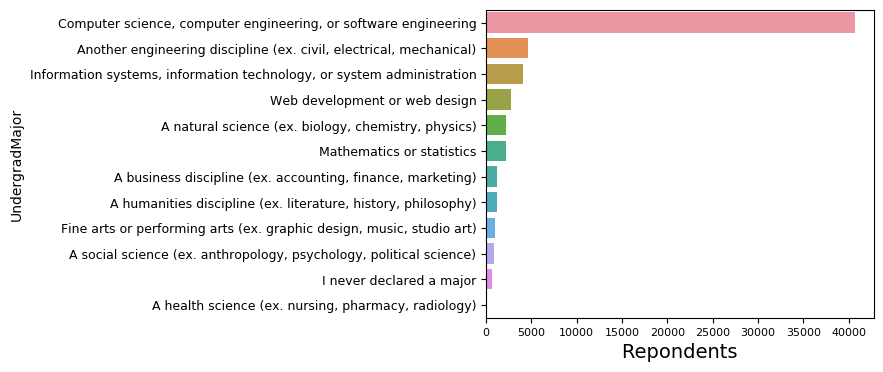

In [26]:
# sns plot for the same data
plt.figure(figsize=(5,4))
sns.countplot(y = edlvl_count.UndergradMajor, order=edlvl_19.UndergradMajor.value_counts().index);

#plt.title(''.title(), fontsize=20);
#plt.ylabel(''.title(), fontsize=14);
plt.xlabel('Repondents'.title(), fontsize=14);
# Labels font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.show()

## Interpretation III
So, as it seems it is somewhat possible to have have a job as a professional developper even without a college degree in computer related disciplines. What is the best way to do so?

## Data Visualization VI

In [27]:
# Making a copy of the edlvl_19 dataframe
othered_19 = edlvl_19.copy()
othered_19.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
3,4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
4,5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
6,7,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ..."
8,9,I am a developer by profession,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...
9,10,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN


In [28]:
# Excluding all the data form professional developpers with a College degree in CS, CE or SE
editedu_19 = othered_19[~othered_19['UndergradMajor'].isin(['Computer science, computer engineering, or software engineering'])]
editedu_19.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
6,7,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ..."
9,10,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN
15,16,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Taken an online course in programming or softw...
21,22,I am a developer by profession,Some college/university study without earning ...,NaN,Taken an online course in programming or softw...
22,23,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...


In [50]:
editunique_19 = editedu_19.copy()
editunique_19.describe()

,Respondent
count,26554.000000
mean,44305.343300
std,25680.474181
min,7.000000
25%,22104.250000
50%,44128.000000
75%,66486.250000
max,88875.000000


In [79]:
# Filling the N/A values
editunique_19['EduOther'] = editunique_19['EduOther'].fillna('Not indicated')
editunique_19.head()

,Respondent,MainBranch,EdLevel,UndergradMajor,EduOther
6,7,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ..."
9,10,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,
15,16,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Taken an online course in programming or softw...
21,22,I am a developer by profession,Some college/university study without earning ...,NaN,Taken an online course in programming or softw...
22,23,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...


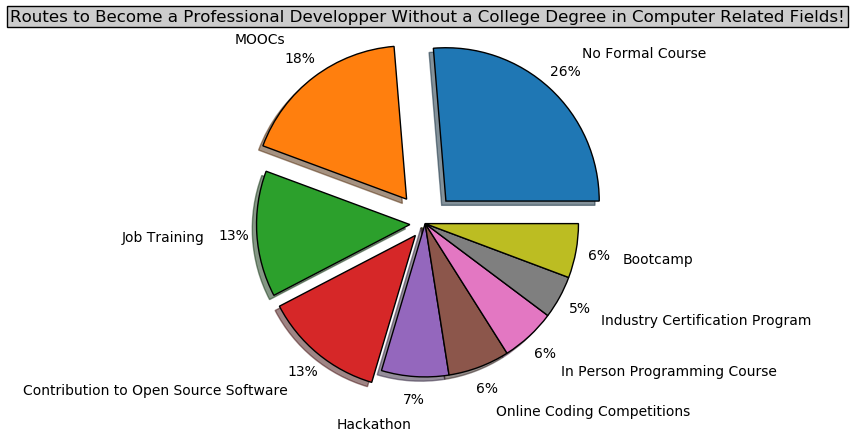

In [118]:
# Creating the features of a dataframe
# Counting filtered features
one_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('without taking a formal course')].count()[0]
two_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('MOOC')].count()[0]
three_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('training in software')].count()[0]
four_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('open source software')].count()[0]
five_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('hackathon')].count()[0]
six_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('online coding competitions')].count()[0]
seven_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('Taken a part-time')].count()[0]
eight_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('certification program')].count()[0]
nine_2 = editunique_19.loc[editunique_19['EduOther'].str.contains('bootcamp')].count()[0]

# Creating Shorter Labels
Labels = ['No Formal Course', 'MOOCs', 'Job Training ', 'Contribution to Open Source Software', 'Hackathon', 'Online Coding Competitions', 'In Person Programming Course', 'Industry Certification Program', 'Bootcamp']

# Plotting Pie Chart
explode = (0.2,0.2,0.1,0.1,0,0,0,0,0)
plt.pie([one_2,two_2,three_2,four_2,five_2,six_2,seven_2,eight_2,nine_2], labels = Labels, shadow=True, explode = explode, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.31, wedgeprops={"edgecolor":"0",'linewidth': 1, 'antialiased': True})
plt.axis('equal')
plt.title('Routes to Become a Professional Developper Without a College Degree in Computer Related Fields!', bbox={'facecolor':'0.8', 'pad':2})
plt.show()

## Interpretation VI
For people wanting to become professional developers without a university degree in computer science, computer engineering or software engineering, there are two best options.
1. The first route to take is to learn programming through using free online materials. Individuals can use blogposts, youtube videos or any free material online.
2. The second option is opting for MOOCs.

# Conclusion

This analysis has shown that it is possible to work as a developer without a College degree in computer related fields. The best way to start is through investing in self learning from online resources or using MOOCs. Owing to the fact that the majority of the world is on lockdown, this could be the perfect opportunity for someone to start his journey to become a developer, and now that someone knows where to start.